# Ways to  deal with outliers

In [1]:
#Importing the dataset
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings 
warnings.filterwarnings('ignore')

In [2]:
boston=load_boston() #it is stored as dictionary
df= p.DataFrame(boston['data'],columns=boston['feature_names']) #converting dictionary to data frame

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:xlabel='RM', ylabel='Density'>

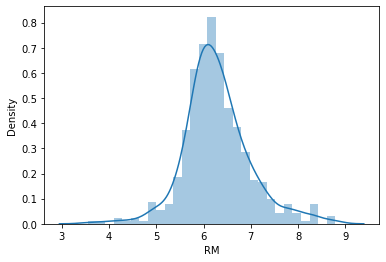

In [77]:
sns.distplot(df['RM'])

<AxesSubplot:xlabel='RM'>

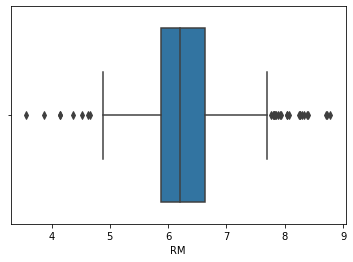

In [70]:
#As we can see outliers 
sns.boxplot(df['RM'])

# Trimming outliers from the dataset

In [49]:
def outliers(data):
    IQR=data.quantile(0.75)-data.quantile(0.25)
    lr=data.quantile(0.25)-(1.5*IQR) #lower range
    hr=data.quantile(0.70)+(1.5*IQR) #higher range
    return data.loc[~(n.where(data<lr,True,n.where(data>hr,True,False)))] #Without outliers

In [50]:
outliers(df['RM']) #as we csn there is no outliers

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 472, dtype: float64

<AxesSubplot:xlabel='RM'>

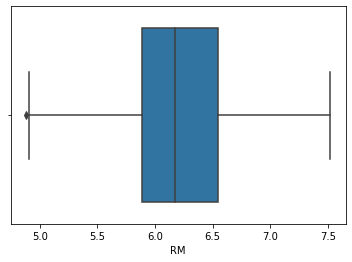

In [51]:
sns.boxplot(outliers(df['RM']))

In [97]:
#We can find outlier with using mean and standard deviation in case of IQR
def outliers(data,k):
    lr=data.mean()-(data.std()*k) #where n is number
    hr=data.mean()+(data.std()*k)
    return data.loc[~(n.where(data<lr,True,n.where(data>hr,True,False)))] #Without outliers

In [99]:
outliers(df['RM'],1.5)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 449, dtype: float64

# Performing winsorization


Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values.
Data greater then qurantile 90 percent is replace by value at 90 qurantile similarly less then qurantile 5 percent is replace by value at 5 qurantile

In [105]:
def fn(data,lw,h):
    lr=data.quantile(lw)
    hr=data.quantile(h)
    return n.where(data<lr,lr,n.where(data>hr,hr,data))

<AxesSubplot:>

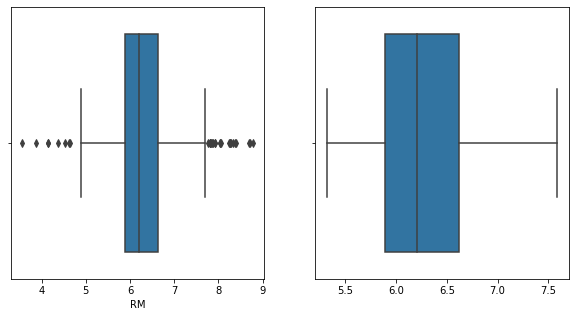

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['RM'])
plt.subplot(1,2,2)
sns.boxplot(fn(df['RM'],0.05,0.95))

# Capping the variable at arbitrary maximum and minimum values


In [21]:
def outliers(data):
    IQR=data.quantile(0.75)-data.quantile(0.25)
    lr=data.quantile(0.25)-(1.5*IQR) #lower range
    hr=data.quantile(0.75)+(1.5*IQR) #higher range
    return n.where(data<lr,lr,n.where(data>hr,hr,data))
def outliers_mean(data,k):
    lr=data.mean()-(data.std()*k) #where k is number
    hr=data.mean()+(data.std()*k)
    return n.where(data<lr,lr,n.where(data>hr,hr,data))

<AxesSubplot:>

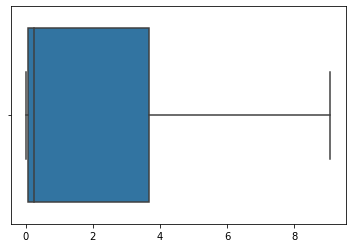

In [26]:
sns.boxplot(outliers(df['CRIM'])) 

<AxesSubplot:xlabel='CRIM'>

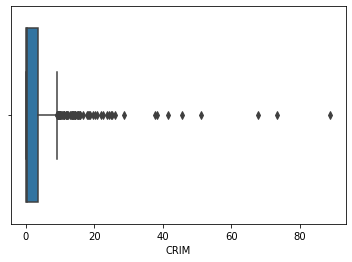

In [24]:
sns.boxplot(df['CRIM'])

<AxesSubplot:ylabel='Density'>

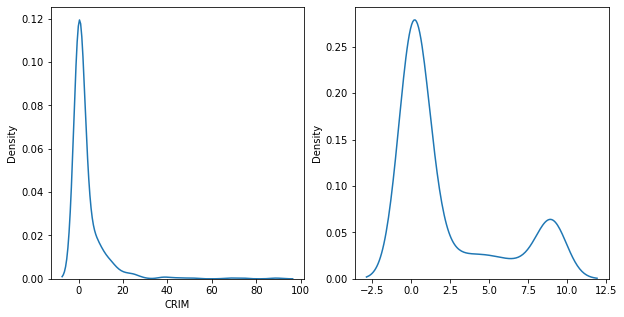

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['CRIM'])
plt.subplot(1,2,2)
sns.kdeplot(outliers(df['CRIM']))

# Performing zero-coding – capping the variable at zero

In [43]:
#creating a dummy dataset
n.random.seed(29)
x=n.random.randn(200)
y=n.random.randn(200)*2
z=n.random.randn(200)*6+5

In [44]:
df=p.DataFrame({'x':x,"y":y,'z':z})

In [45]:
df.head()

,x,y,z
0,-0.417482,2.903260,4.634786
1,0.706032,0.930279,10.236479
2,1.915985,0.688840,11.964026
3,-2.141755,-0.511348,13.884419
4,0.719057,-1.611499,18.030882


In [51]:
df.min() #minmum values are negative

x   -3.505401
y   -4.901451
z   -8.863583
dtype: float64

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

<Figure size 1080x360 with 0 Axes>

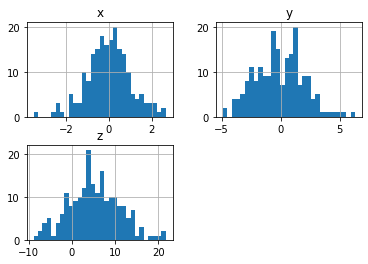

In [55]:
plt.figure(figsize=(15,5))
df.hist(bins= 30)

In [56]:
#AS we can see the negtive values

In [59]:
#Replacing the negative values with zeros
df['x'].loc[df['x']<0]=0 
df['y'].loc[df['y']<0]=0
df['z'].loc[df['z']<0]=0

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

<Figure size 1080x360 with 0 Axes>

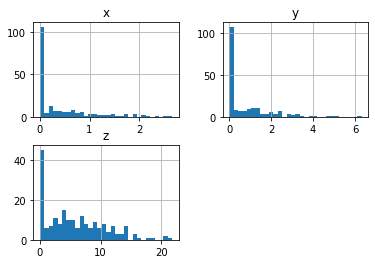

In [60]:
plt.figure(figsize=(15,5))
df.hist(bins= 30)

In [61]:
#now we can see increase in the nuber of zero values present 